In [29]:
#problem 2
import pandas as pd
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis
from sklearn import datasets, linear_model, discriminant_analysis
from sklearn.linear_model import LogisticRegression
from itertools import chain
from sklearn.metrics import f1_score

df = pd.read_csv('hw1_input.csv')
# df_replace=df.replace(['Yes','No'],['1','0'])
# df_replace=df_replace.replace(['Female','Male'],['1','0'])
# df_replace=df_replace.replace(['Asymptomatic','Abnormal','Angina','None'],['0','1','2','3'])
# df_replace=df_replace.replace(['norm',' hyper','abnorm'],['0','1','2'])
# df_replace=df_replace.replace(['Up','Flat','Down'],['0','1','2'])
# df_replace=df_replace.replace(['reversible Defect','Normal','Fixed Defect'],['0','1','2'])

df_replace = df.replace(['Male','Female','Yes','No','None','Angina','Abnormal','Asymptomatic',' hyper','abnorm','norm','Up','Flat','Down','reversible Defect','Fixed Defect','Normal'],
['1','0','1','0','3','2','1','0','2','1','0','2','1','0','2','1','0'])

x = df_replace[['Age','Sex','Chest Pain','BP','Cholestoral','fasting blood sugar > 120','resting ECG','max hr','angina','oldpeak','slope','major vessels','defect']]
x = np.array(x)
y = df_replace[['heart disease']]
y = np.array(y).reshape(-1)
#print(df.head(10))
bs_number = 1000
ridgeCoefficient = []
lassoCoefficient =[]
Scores = []
numberoftest  = int(0.2*len(df_replace))
numberoftrain = len(df_replace) - numberoftest


for _ in range(bs_number):
    train_set = np.asarray([True]*numberoftrain + [False]*numberoftest)
    np.random.shuffle(train_set)

    x_train, x_test, y_train, y_test = x[train_set], x[np.logical_not(train_set)], y[train_set], y[np.logical_not(train_set)]

    ridgeRegression = LogisticRegression(penalty = 'l2',solver='liblinear')
    ridgeRegression.fit(x_train, y_train)
    ridgeCoefficient.append(ridgeRegression.coef_)
    lassoRegression = LogisticRegression(penalty = 'l1',solver='liblinear')
    lassoRegression.fit(x_train, y_train)
    lassoCoefficient.append(lassoRegression.coef_)
    
print(num_lasso)
print('ridge mean coef',np.mean(ridgeCoefficient))
print('lasso mean coef',np.mean(lassoCoefficient))
print('ridge deviation coef',np.std(ridgeCoefficient))
print('lasso deviation coef',np.std(lassoCoefficient))





[array([-0.02300739]), array([-1.01339865]), array([-0.03026404]), array([0.01647758]), array([0.00654826]), array([-0.45136901]), array([0.26565502]), array([-0.02881244]), array([0.87964906]), array([0.32349336]), array([-0.24445715]), array([1.07480209]), array([0.82230355])]
ridge mean coef 0.10948603266052508
lasso mean coef 0.12297639432796888
ridge deviation coef 0.5795985189595005
lasso deviation coef 0.5622561099355647


In [30]:
    
num_ridge = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]
num_lasso = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]
#bootstraping 1000times
for i in range(1000):
    for j in range(13):
        num_ridge[j] += ridgeCoefficient[i][0][j]/1000
print(num_ridge)


for i in range(1000):
    for j in range(13):
        num_lasso[j] += lassoCoefficient[i][0][j]/1000

[array([-0.02426211]), array([-1.00787641]), array([-0.04456042]), array([0.0172672]), array([0.00640566]), array([-0.59448215]), array([0.29236281]), array([-0.02786979]), array([0.89596111]), array([0.31802031]), array([-0.32725056]), array([1.09378119]), array([0.82582159])]


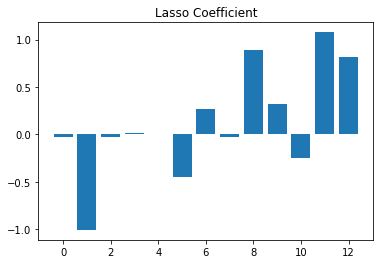

In [31]:
#Lasso

num_lasso1=list(chain(*num_lasso))
plt.bar(range(13), num_lasso1)
plt.title('Lasso Coefficient')
plt.show()


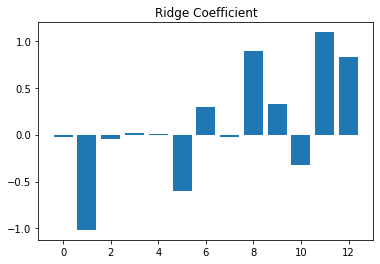

In [32]:
#Ridge

num_ridge=list(chain(*num))
plt.bar(range(13), num_ridge)
plt.title('Ridge Coefficient')
plt.show()

<Figure size 432x288 with 0 Axes>

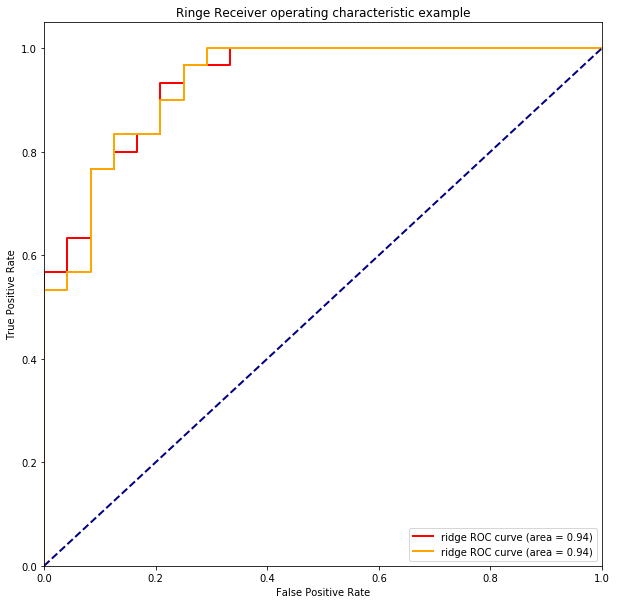

In [39]:
#problem 3
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  




train_set = np.asarray([True]*numberoftrain + [False]*numberoftest)
np.random.shuffle(train_set)

x_train, x_test, y_train, y_test = x[train_set], x[np.logical_not(train_set)], y[train_set], y[np.logical_not(train_set)]
y_test1 = list(map(int,y_test))
ridgeRegression = LogisticRegression(penalty = 'l2',solver='liblinear')
ridgeRegression.fit(x_train, y_train)
ridgeCoefficient.append(ridgeRegression.coef_)
    
a = ridgeRegression.predict_proba(x_test)
proba_ridge=a[:,1]
#     print(b)
y_score_ridge = list(map(float,proba_ridge))
fpr,tpr,threshold = roc_curve(y_test1, y_score_ridge)
roc_auc = auc(fpr,tpr)
    
lassoRegression = LogisticRegression(penalty = 'l1',solver='liblinear')
lassoRegression.fit(x_train, y_train)
lassoCoefficient.append(lassoRegression.coef_)
ls=lassoRegression.predict_proba(x_test)
proba_lasso=ls[:,1]
y_score_lasso = list(map(float,proba_lasso))

fpr1,tpr1,threshold1 = roc_curve(y_test1, y_score_lasso)
roc_auc1 = auc(fpr1,tpr1)
    
    
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='red',lw=lw, label='ridge ROC curve (area = %0.2f)' % roc_auc) 
plt.plot(fpr1, tpr1, color='orange',lw=lw, label='ridge ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ringe Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [66]:
# Question 5
auroc_lasso = []
auroc_ringe = []
for _ in range(bs_number):
    train_set = np.asarray([True]*numberoftrain + [False]*numberoftest)
    np.random.shuffle(train_set)

    x_train, x_test, y_train, y_test = x[train_set], x[np.logical_not(train_set)], y[train_set], y[np.logical_not(train_set)]
    y_test1 = list(map(int,y_test))
    ridgeRegression = LogisticRegression(penalty = 'l2',solver='liblinear')
    ridgeRegression.fit(x_train, y_train)
    ridgeCoefficient.append(ridgeRegression.coef_)

    a = ridgeRegression.predict_proba(x_test)
    proba_ridge=a[:,1]
#     print(b)
    y_score_ridge = list(map(float,proba_ridge))
    fpr,tpr,threshold = roc_curve(y_test1, y_score_ridge)
    roc_auc = auc(fpr,tpr)
    auroc_ringe.append(roc_auc)
    
    lassoRegression = LogisticRegression(penalty = 'l1',solver='liblinear')
    lassoRegression.fit(x_train, y_train)
    lassoCoefficient.append(lassoRegression.coef_)
    ls=lassoRegression.predict_proba(x_test)
    proba_lasso=ls[:,1]
    y_score_lasso = list(map(float,proba_lasso))
    
    
    fpr1,tpr1,threshold1 = roc_curve(y_test1, y_score_lasso)
    roc_auc1 = auc(fpr1,tpr1)
    auroc_lasso.append(roc_auc1)
print(np.mean(auroc_lasso))#Lasso Regression: Mean of AUROC
print(np.mean(auroc_ringe))#ridge Regression: Mean of AUROC

print(np.std(auroc_lasso))#Lasso Regression: Standard Deviation of AUROC
print(np.std(auroc_ringe))#Ridge Regression: Standard Deviation of AUROC

0.9102271182208124
0.9109502571508479
0.030660394118436726
0.028978516511155586


Using ridge when threshold is  0.1 mean of F1 score  :  0.8121205280705522
 Using ridge when threshold is  0.1  standard deviation of F1 score:  0.04424316715945953
Using ridge when threshold is  0.2 mean of F1 score  :  0.8181848613024985
 Using ridge when threshold is  0.2  standard deviation of F1 score:  0.06957318741870629
Using ridge when threshold is  0.3 mean of F1 score  :  0.796700742947669
 Using ridge when threshold is  0.3  standard deviation of F1 score:  0.0378897054540335
Using ridge when threshold is  0.4 mean of F1 score  :  0.8324179338499874
 Using ridge when threshold is  0.4  standard deviation of F1 score:  0.04507800518104401
Using ridge when threshold is  0.5 mean of F1 score  :  0.8492997216087816
 Using ridge when threshold is  0.5  standard deviation of F1 score:  0.02372531461196882
Using ridge when threshold is  0.6 mean of F1 score  :  0.792915447819555
 Using ridge when threshold is  0.6  standard deviation of F1 score:  0.04502143715734729
Using ridge w

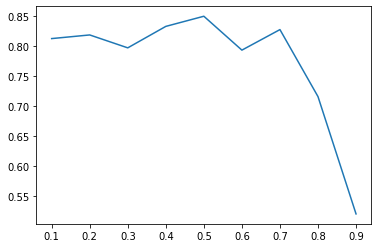

In [80]:
#problem 4 
# ridge threshold test


df = pd.read_csv('hw1_input.csv')
df=df.replace({'Female':1,'Male':0,'Abnormal':1,'Asymptomatic':0,'Angina':2,'None':3,'No':1,'Yes':0,' hyper':1,'norm':0,'abnorm':2,'Flat':1,'Up':0,'Down':2,'Normal':1,'Fixed Defect':2,'reversible Defect':0})

# df_all=df.replace(['Yes','No'],['1','0'])
# df_all=df_all.replace(['Female','Male'],['1','0'])
# df_all=df_all.replace(['Asymptomatic','Abnormal','Angina','None'],['0','1','2','3'])
# df_all=df_all.replace(['norm',' hyper','abnorm'],['0','1','2'])
# df_all=df_all.replace(['Up','Flat','Down'],['0','1','2'])
# df_all=df_all.replace(['reversible Defect','Normal','Fixed Defect'],['0','1','2'])

x = df[['Age','Sex','Chest Pain','BP','Cholestoral','fasting blood sugar > 120','resting ECG','max hr','angina','oldpeak','slope','major vessels','defect']]
x = np.array(x)
y = df[['heart disease']]
y = np.array(y).reshape(-1)
bs_number = 10
num_samples = len(x)
numberoftest = int(num_samples*0.2)
numberoftrain = num_samples - numberoftest
# print('number of training samples: ', numberoftrain)
total_cof = 0

f1_mean=[]
decision_thre=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)
mean=[]
for i in decision_thre:
    f1_prolist=[]
    for _ in range(bs_number):
        xs = []
        ys = []

        shuffle = list(range(num_samples))
        np.random.shuffle(shuffle)
        xs = x[shuffle]
        ys = y[shuffle]
        x_train, x_test = xs[:numberoftrain], xs[numberoftrain:]
        y_train, y_test = ys[:numberoftrain], ys[numberoftrain:]
        ridge_regression = LogisticRegression(penalty='l2',solver = 'liblinear').fit(x_train, y_train)
#         pred_ridge = np.where(ridge_regression.predict_proba(x_test)[:,1] > decision_thre[i], 1, 0)
        y_score = ridge_regression.predict_proba(x_test)
        y_prolist = []
        for item in y_score:
            if item[1]>i:
                y_pro=1
            else:
                y_pro=0
            y_prolist.append(y_pro)
        f1_prolist.append(f1_score(y_test, y_prolist))
    mean.append(np.mean(f1_prolist))
    print('Using ridge when threshold is ', i, 'mean of F1 score  : ', np.mean(f1_prolist))
    print(' Using ridge when threshold is ', i, ' standard deviation of F1 score: ', np.std(f1_prolist))
plt.plot(decision_thre,mean)
plt.show()

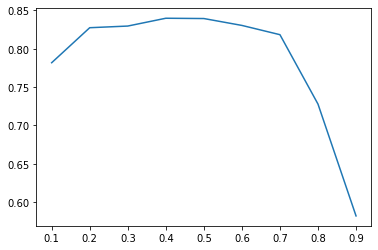

In [78]:
#problem 4 
# lasso threshold test
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('hw1_input.csv')
df=df.replace({'Female':1,'Male':0,'Abnormal':1,'Asymptomatic':0,'Angina':2,'None':3,'No':1,'Yes':0,' hyper':1,'norm':0,'abnorm':2,'Flat':1,'Up':0,'Down':2,'Normal':1,'Fixed Defect':2,'reversible Defect':0})

# df_all=df.replace(['Yes','No'],['1','0'])
# df_all=df_all.replace(['Female','Male'],['1','0'])
# df_all=df_all.replace(['Asymptomatic','Abnormal','Angina','None'],['0','1','2','3'])
# df_all=df_all.replace(['norm',' hyper','abnorm'],['0','1','2'])
# df_all=df_all.replace(['Up','Flat','Down'],['0','1','2'])
# df_all=df_all.replace(['reversible Defect','Normal','Fixed Defect'],['0','1','2'])

x = df[['Age','Sex','Chest Pain','BP','Cholestoral','fasting blood sugar > 120','resting ECG','max hr','angina','oldpeak','slope','major vessels','defect']]
x = np.array(x)
y = df[['heart disease']]
y = np.array(y).reshape(-1)
bs_number = 10
num_samples = len(x)
numberoftest = int(num_samples*0.2)
numberoftrain = num_samples - numberoftest
# print('number of training samples: ', numberoftrain)
total_cof = 0

f1_mean=[]
decision_thre=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)
mean=[]

for i in decision_thre:
    f1_prolist=[]
    for _ in range(bs_number):
        xs = []
        ys = []

        shuffle = list(range(num_samples))
        np.random.shuffle(shuffle)
        xs = x[shuffle]
        ys = y[shuffle]
        x_train, x_test = xs[:numberoftrain], xs[numberoftrain:]
        y_train, y_test = ys[:numberoftrain], ys[numberoftrain:]
        lasso_regression = LogisticRegression(penalty='l1',solver = 'liblinear').fit(x_train, y_train)

        y_score = lasso_regression.predict_proba(x_test)
        y_prolist = []
        for item in y_score:
            if item[1]>i:
                y_pro=1
            else:
                y_pro=0
            y_prolist.append(y_pro)
        f1_prolist.append(f1_score(y_test, y_prolist))
    mean.append(np.mean(f1_prolist))

#     print('using lasso when threshold is ', i, 'mean of F1 score  : ', np.mean(f1_prolist))
#     print('using lasso when threshold is ', i, ' standard deviation of F1 score: ', np.std(f1_prolist))
plt.plot(decision_thre,mean)
plt.show()


using lasso when threshold is  0.34 mean of F1 score  :  0.8306915060382568
using lasso when threshold is  0.34  standard deviation of F1 score:  0.04327159344578735
using lasso when threshold is  0.36 mean of F1 score  :  0.8452599296426003
using lasso when threshold is  0.36  standard deviation of F1 score:  0.04124206624063743
using lasso when threshold is  0.37 mean of F1 score  :  0.8329080868940428
using lasso when threshold is  0.37  standard deviation of F1 score:  0.03851542239821478
using lasso when threshold is  0.39 mean of F1 score  :  0.8619845345529772
using lasso when threshold is  0.39  standard deviation of F1 score:  0.04915166692547036
using lasso when threshold is  0.41 mean of F1 score  :  0.8383767734878923
using lasso when threshold is  0.41  standard deviation of F1 score:  0.054329796322711885
using lasso when threshold is  0.43 mean of F1 score  :  0.8280763436031398
using lasso when threshold is  0.43  standard deviation of F1 score:  0.04929415081508374
usi

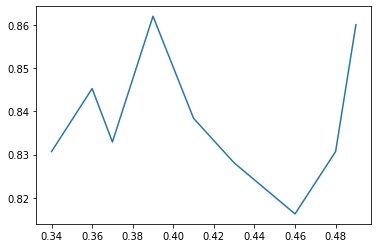

In [82]:
#problem 6
# lasso threshold test
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('hw1_input.csv')
df=df.replace({'Female':1,'Male':0,'Abnormal':1,'Asymptomatic':0,'Angina':2,'None':3,'No':1,'Yes':0,' hyper':1,'norm':0,'abnorm':2,'Flat':1,'Up':0,'Down':2,'Normal':1,'Fixed Defect':2,'reversible Defect':0})

# df_all=df.replace(['Yes','No'],['1','0'])
# df_all=df_all.replace(['Female','Male'],['1','0'])
# df_all=df_all.replace(['Asymptomatic','Abnormal','Angina','None'],['0','1','2','3'])
# df_all=df_all.replace(['norm',' hyper','abnorm'],['0','1','2'])
# df_all=df_all.replace(['Up','Flat','Down'],['0','1','2'])
# df_all=df_all.replace(['reversible Defect','Normal','Fixed Defect'],['0','1','2'])

x = df[['Age','Sex','Chest Pain','BP','Cholestoral','fasting blood sugar > 120','resting ECG','max hr','angina','oldpeak','slope','major vessels','defect']]
x = np.array(x)
y = df[['heart disease']]
y = np.array(y).reshape(-1)
bs_number = 10
num_samples = len(x)
numberoftest = int(num_samples*0.2)
numberoftrain = num_samples - numberoftest
# print('number of training samples: ', numberoftrain)
total_cof = 0

f1_mean=[]
decision_thre=(0.34,0.36,0.37,0.39,0.41,0.43,0.46,0.48,0.49)
mean=[]

for i in decision_thre:
    f1_prolist=[]
    for _ in range(bs_number):
        xs = []
        ys = []

        shuffle = list(range(num_samples))
        np.random.shuffle(shuffle)
        xs = x[shuffle]
        ys = y[shuffle]
        x_train, x_test = xs[:numberoftrain], xs[numberoftrain:]
        y_train, y_test = ys[:numberoftrain], ys[numberoftrain:]
        lasso_regression = LogisticRegression(penalty='l1',solver = 'liblinear').fit(x_train, y_train)

        y_score = lasso_regression.predict_proba(x_test)
        y_prolist = []
        for item in y_score:
            if item[1]>i:
                y_pro=1
            else:
                y_pro=0
            y_prolist.append(y_pro)
        f1_prolist.append(f1_score(y_test, y_prolist))
    mean.append(np.mean(f1_prolist))

    print('using lasso when threshold is ', i, 'mean of F1 score  : ', np.mean(f1_prolist))
    print('using lasso when threshold is ', i, ' standard deviation of F1 score: ', np.std(f1_prolist))
plt.plot(decision_thre,mean)
plt.show()


Using ridge when threshold is  0.44 mean of F1 score  :  0.8119769521682203
 Using ridge when threshold is  0.44  standard deviation of F1 score:  0.053630144804210016
Using ridge when threshold is  0.46 mean of F1 score  :  0.8229832738590834
 Using ridge when threshold is  0.46  standard deviation of F1 score:  0.046693560480651694
Using ridge when threshold is  0.47 mean of F1 score  :  0.8373045957661291
 Using ridge when threshold is  0.47  standard deviation of F1 score:  0.042000909304548806
Using ridge when threshold is  0.49 mean of F1 score  :  0.8386128926451544
 Using ridge when threshold is  0.49  standard deviation of F1 score:  0.02832940652655484
Using ridge when threshold is  0.51 mean of F1 score  :  0.8527734719502966
 Using ridge when threshold is  0.51  standard deviation of F1 score:  0.028774504831558228
Using ridge when threshold is  0.53 mean of F1 score  :  0.8353201479564154
 Using ridge when threshold is  0.53  standard deviation of F1 score:  0.046317831949

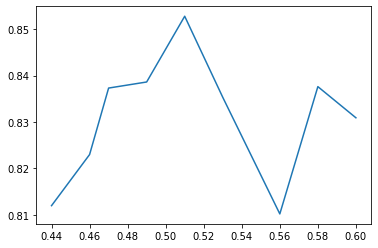

In [85]:
#problem 4 
# ridge threshold test


df = pd.read_csv('hw1_input.csv')
df=df.replace({'Female':1,'Male':0,'Abnormal':1,'Asymptomatic':0,'Angina':2,'None':3,'No':1,'Yes':0,' hyper':1,'norm':0,'abnorm':2,'Flat':1,'Up':0,'Down':2,'Normal':1,'Fixed Defect':2,'reversible Defect':0})

# df_all=df.replace(['Yes','No'],['1','0'])
# df_all=df_all.replace(['Female','Male'],['1','0'])
# df_all=df_all.replace(['Asymptomatic','Abnormal','Angina','None'],['0','1','2','3'])
# df_all=df_all.replace(['norm',' hyper','abnorm'],['0','1','2'])
# df_all=df_all.replace(['Up','Flat','Down'],['0','1','2'])
# df_all=df_all.replace(['reversible Defect','Normal','Fixed Defect'],['0','1','2'])

x = df[['Age','Sex','Chest Pain','BP','Cholestoral','fasting blood sugar > 120','resting ECG','max hr','angina','oldpeak','slope','major vessels','defect']]
x = np.array(x)
y = df[['heart disease']]
y = np.array(y).reshape(-1)
bs_number = 10
num_samples = len(x)
numberoftest = int(num_samples*0.2)
numberoftrain = num_samples - numberoftest
# print('number of training samples: ', numberoftrain)
total_cof = 0

f1_mean=[]
decision_thre=(0.44,0.46,0.47,0.49,0.51,0.53,0.56,0.58,0.60)
mean=[]
for i in decision_thre:
    f1_prolist=[]
    for _ in range(bs_number):
        xs = []
        ys = []

        shuffle = list(range(num_samples))
        np.random.shuffle(shuffle)
        xs = x[shuffle]
        ys = y[shuffle]
        x_train, x_test = xs[:numberoftrain], xs[numberoftrain:]
        y_train, y_test = ys[:numberoftrain], ys[numberoftrain:]
        ridge_regression = LogisticRegression(penalty='l2',solver = 'liblinear').fit(x_train, y_train)
#         pred_ridge = np.where(ridge_regression.predict_proba(x_test)[:,1] > decision_thre[i], 1, 0)
        y_score = ridge_regression.predict_proba(x_test)
        y_prolist = []
        for item in y_score:
            if item[1]>i:
                y_pro=1
            else:
                y_pro=0
            y_prolist.append(y_pro)
        f1_prolist.append(f1_score(y_test, y_prolist))
    mean.append(np.mean(f1_prolist))
    print('Using ridge when threshold is ', i, 'mean of F1 score  : ', np.mean(f1_prolist))
    print(' Using ridge when threshold is ', i, ' standard deviation of F1 score: ', np.std(f1_prolist))
plt.plot(decision_thre,mean)
plt.show()